# Identitas

In [16]:
NAMA = "Muhammad Mariozulfandy"
KELAS = "B"
NPM = "2206041404"
KELOMPOK = "OK Gas"
TOPIK = "Health Admissions"

# Dataset

Dataset berisikan informasi umum, diagnosa penyakit, hasil lab, dan data pasien selama dirawat di rumah sakit

56 Kolom x 12551 baris

- SNO : Serial Number (unique)
- MRD No. : Admission Number
- D.O.A  : Date of Admission
- D.O.D   : Date of Discharge
- AGE     : Age patient
- GENDER  : Gender patient (F (Female)/M (Male)
- RURAL   : Household are of patient ( U (Urban)/ R (Rural))
- TYPE OF ADMISSION-EMERGENCY/OPD  : O (Outpatient)/E (Emergency)
- month year   : Month and year of admission
- DURATION OF STAY   : How long the patient stay in hospital
- duration of intensive unit stay  : How long the patient do intensive stay in hospital
- SMOKING : Is patient smoke? (1 (True)/ 0(False))
- ALCOHOL  : Is patient drink alcohol? (1 (True)/ 0(False))
- DM   : Diabetes Mellitus
- HTN : Hypertension
- CAD : Coronary Artery Disease
- PRIOR CMP : CARDIOMYOPATHY
- CKD  : CHRONIC KIDNEY DISEASE
- TLC  : TOTAL LEUKOCYTES COUNT
- PLATELETS : Platelets on patient
- GLUCOSE : Glucose on patient
- UREA  
- CREATININE  : Creatinine on patient
- BNP   : B-TYPE NATRIURETIC PEPTIDE
- RAISED CARDIAC ENZYMES 
- EF    : Ejection Fraction
- SEVERE ANAEMIA 
- ANAEMIA   
- STABLE ANGINA  
- ACS   : Acute coronary Syndrome
- STEMI  : ST ELEVATION MYOCARDIAL INFARCTION
- ATYPICAL CHEST PAIN  
- HEART FAILURE    
- HFREF  : HEART FAILURE WITH REDUCED EJECTION FRACTION
- HFNEF  : HEART FAILURE WITH NORMAL EJECTION FRACTION
- VALVULAR  : Valvular Heart Disease
- CHB  : Complete Heart Block
- SSS  : Sick sinus syndrome
- AKI  : ACUTE KIDNEY INJURY
- CVA INFRACT  : Cerebrovascular Accident INFRACT
- CVA BLEED  : Cerebrovascular Accident BLEED
- AF  : Atrial Fibrilation
- VT  : Ventricular Tachycardia
- PSVT : PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA
- CONGENITAL : Congenital Heart Disease
- UTI  : Urinary tract infection
- NEURO CARDIOGENIC SYNCOPE
- ORTHOSTATIC 
- INFECTIVE ENDOCARDITIS
- DVT  : Deep venous thrombosis
- CARDIOGENIC SHOCK
- SHOCK  
- PULMONARY EMBOLISM   
- CHEST INFECTION  
- OUTCOME  : outcome the patient (Discharge / DAMA (Discharged Against Medical Advice)/ Expiry)
- HB : Hemoglobin

In [17]:
import pandas as pd

df = pd.read_csv('admission.csv')
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB
0,3615,344173,10/9/2017,10/15/2017,63,F,U,O,Oct-17,7,...,0,0,0,0,0,0,0,0,DISCHARGE,10.9
1,14308,665288,04/02/2019,08/02/2019,47,M,U,O,Feb-19,5,...,0,0,0,0,0,0,0,0,DISCHARGE,15
2,3303,203598,25/09/2017,26/09/2017,59,M,U,E,Sep-17,2,...,0,0,0,0,0,0,0,0,DISCHARGE,13.7
3,15405,640386,17/03/2019,25/03/2019,62,M,R,E,Mar-19,9,...,0,0,0,0,0,0,0,0,DISCHARGE,13.3
4,2232,168189,7/28/2017,8/1/2017,55,F,U,E,Jul-17,5,...,0,0,0,0,0,0,0,0,DISCHARGE,11.8


In [18]:
# Menampilkan informasi keseluruhan terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              12551 non-null  int64 
 1   MRD No.                          12551 non-null  object
 2   D.O.A                            12551 non-null  object
 3   D.O.D                            12551 non-null  object
 4   AGE                              12551 non-null  int64 
 5   GENDER                           12551 non-null  object
 6   RURAL                            12551 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object
 8   month year                       12551 non-null  object
 9   DURATION OF STAY                 12551 non-null  int64 
 10  duration of intensive unit stay  12551 non-null  int64 
 11  SMOKING                          12551 non-null  int64 
 12  ALCOHOL                         

# Analisis Data Eksplorasi

## 1. Pada bulan apakah jumlah pasien terbanyak yang dirawat di rumah sakit?

In [19]:
# ubah ke datetime
df['month-year'] = pd.to_datetime(df['month year'], format='%b-%y')
monthly_admissions = df['month-year'].value_counts().sort_index()

# cari yang maksimal
max_admission_month = monthly_admissions.idxmax()
max_admission_count = monthly_admissions.max()

max_admission_month, max_admission_count

(Timestamp('2019-01-01 00:00:00'), 688)

Bulan Paling banyak menerima pasien dalah pada januari 2019.

## 2. Bagaimana karakteristik pasien yang menderita heart failure?

In [20]:
heart_failure_data = df[df['HEART FAILURE'] == 1]

# Characterize these patients by calculating some statistics on age, gender, rural vs. urban
heart_failure_characteristics = heart_failure_data.describe(include='all')[['AGE', 'GENDER', 'RURAL', 'HB', 'DURATION OF STAY', 'ALCOHOL', 'SMOKING ']]
heart_failure_characteristics


,AGE,GENDER,RURAL,HB,DURATION OF STAY,ALCOHOL,SMOKING
count,3665.000000,3665,3665,3665,3665.000000,3665.000000,3665.000000
unique,NaN,2,2,140,NaN,NaN,NaN
top,NaN,M,U,11.4,NaN,NaN,NaN
freq,NaN,2215,2822,78,NaN,NaN,NaN
mean,64.639291,NaN,NaN,NaN,7.766985,0.048840,0.039018
min,14.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,57.000000,NaN,NaN,NaN,4.000000,0.000000,0.000000
50%,65.000000,NaN,NaN,NaN,7.000000,0.000000,0.000000
75%,73.000000,NaN,NaN,NaN,10.000000,0.000000,0.000000
max,110.000000,NaN,NaN,NaN,52.000000,1.000000,1.000000


## 3. Penyakit apa yang terbanyak diderita pasien yang berumur 19 - 25 tahun?

<Axes: >

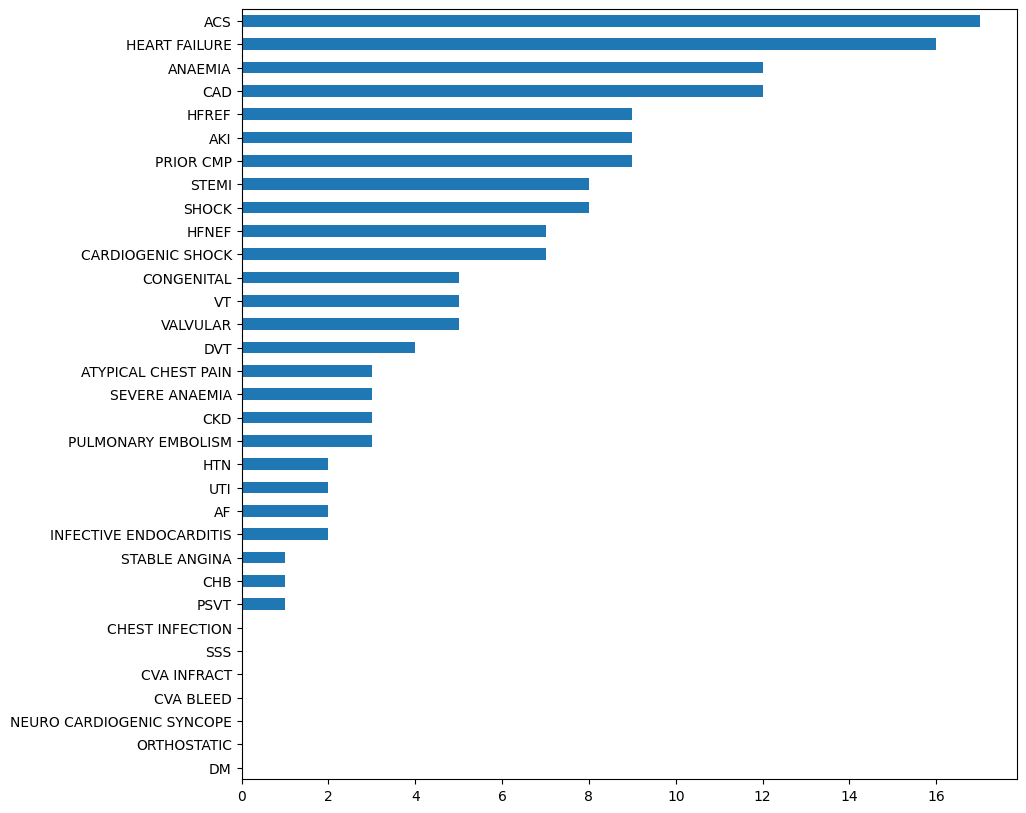

In [21]:
import matplotlib.pyplot as plt

#filter 19-25
age_filtered_data = df[(df['AGE'] >= 19) & (df['AGE'] <= 25)]

disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

age_filtered_data.loc[:, 'CHEST INFECTION'] = pd.to_numeric(age_filtered_data['CHEST INFECTION'], errors='coerce')
# itung jumlah orang pengidap
column_sums = age_filtered_data[disease_columns].sum()
column_sums = column_sums.sort_values()
#bar chart
plt.figure(figsize=(10, 10))

column_sums.plot(kind='barh')


Penyakit yang paling sering diderita adalah ACS   : Acute coronary Syndrome

## 4. Apakah pasien yang memiliki kebiasan merokok dan tinggal di daerah urban memiliki rata-rata komplikasi penyakit yang lebih banyak dibandingkan pasien yang memiliki kebiasan merokok dan tinggal di daerah rural? (komplikasi penyakit dapat diketahui dari jumlah penyakit yang diderita suatu pasien) 

In [22]:
import matplotlib.pyplot as plt

#filter 
urban_smoke = df[(df['SMOKING '] == 1) & (df['RURAL'] == "U")].copy()
rural_smoke = df[(df['SMOKING '] == 1) & (df['RURAL'] == "R")].copy()

disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

urban_smoke.loc[:, 'CHEST INFECTION'] = pd.to_numeric(urban_smoke['CHEST INFECTION'], errors='coerce')
rural_smoke.loc[:, 'CHEST INFECTION'] = pd.to_numeric(rural_smoke['CHEST INFECTION'], errors='coerce')

# itung jumlah penyakit yang diidap tiap pasien
urban_smoke['disease_sum'] = urban_smoke[disease_columns].sum(axis=1)
rural_smoke['disease_sum'] = rural_smoke[disease_columns].sum(axis=1)

# ngitung rata-rata penyakit yang diidap
urban_mean = urban_smoke['disease_sum'].mean()
rural_mean = rural_smoke['disease_sum'].mean()

urban_mean, rural_mean

(3.4763779527559056, 3.4390243902439024)

Iya, namun hanya selisih kecil.

## 5. Usia rata-rata penyandang penyakit

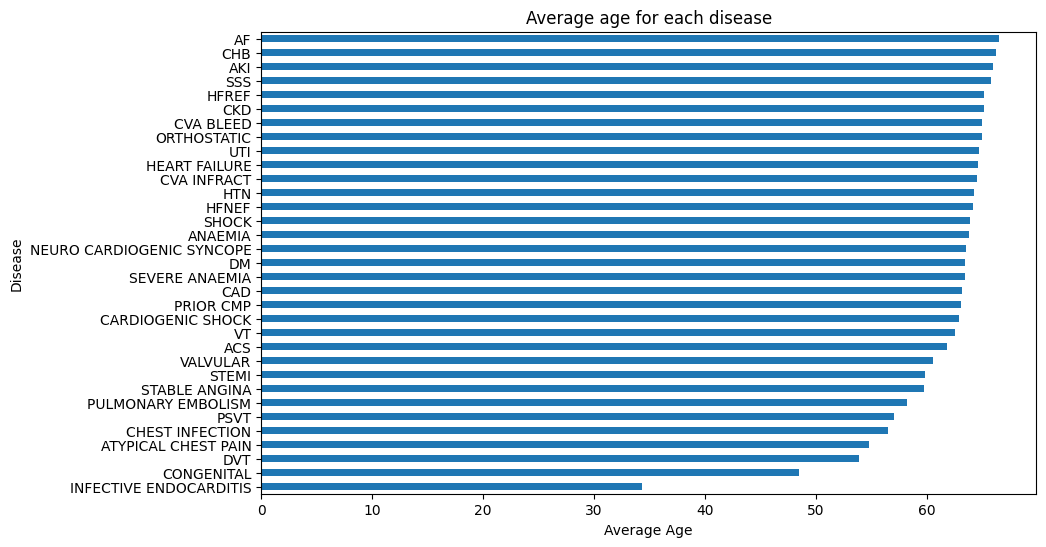

In [23]:

df.loc[:, 'CHEST INFECTION'] = pd.to_numeric(urban_smoke['CHEST INFECTION'], errors='coerce')
average_ages = {}
for disease in disease_columns:
    # Filter pas ada penyakit
    filtered_data = df[df[disease] == 1]

    average_age = round(filtered_data['AGE'].mean(), 2)
    average_ages[disease] = average_age
# jadiin series
average_ages_series = pd.Series(average_ages)

# CBUAT BAR PLOT
plt.figure(figsize=(10, 6))
average_ages_series.sort_values().plot(kind='barh')
plt.xlabel('Average Age')
plt.ylabel('Disease')
plt.title('Average age for each disease')
plt.show()

## 6. Perbandingan persentase peminum alkohol pada tiap penyakit

In [24]:
# pisah jadi pengonsumsi alkohol dan tidak
alcohol_consumers = df[df['ALCOHOL'] == 1]
non_alcohol_consumers = df[df['ALCOHOL'] == 0]

# itung perbedaan tingkat penderita
disease_prevalence_alcohol = {}
disease_prevalence_no_alcohol = {}
diff = {}

for disease in disease_columns:
    prevalence_alcohol = alcohol_consumers[disease].mean()
    prevalence_no_alcohol = non_alcohol_consumers[disease].mean()
    disease_prevalence_alcohol[disease] = prevalence_alcohol
    disease_prevalence_no_alcohol[disease] = prevalence_no_alcohol
    diff[disease] = round(prevalence_alcohol - prevalence_no_alcohol, 3)


diff


{'DM': 0.052,
 'HTN': -0.045,
 'CAD': 0.033,
 'PRIOR CMP': -0.012,
 'CKD': -0.024,
 'SEVERE ANAEMIA': -0.006,
 'ANAEMIA': -0.068,
 'STABLE ANGINA': 0.022,
 'ACS': 0.048,
 'STEMI': 0.052,
 'ATYPICAL CHEST PAIN': 0.005,
 'HEART FAILURE': -0.083,
 'HFREF': -0.043,
 'HFNEF': -0.04,
 'VALVULAR': -0.002,
 'CHB': -0.018,
 'SSS': -0.001,
 'AKI': -0.024,
 'CVA INFRACT': -0.002,
 'CVA BLEED': -0.001,
 'AF': 0.013,
 'VT': -0.009,
 'PSVT': -0.006,
 'CONGENITAL': -0.005,
 'UTI': -0.017,
 'NEURO CARDIOGENIC SYNCOPE': -0.001,
 'ORTHOSTATIC': -0.002,
 'INFECTIVE ENDOCARDITIS': 0.002,
 'DVT': 0.007,
 'CARDIOGENIC SHOCK': -0.016,
 'SHOCK': -0.016,
 'PULMONARY EMBOLISM': 0.002,
 'CHEST INFECTION': 0.001}

# Regresi

Pada problem regresi akan dilakukan prediksi terhadap duration of intensive unit stay (How long the patient do intensive stay in hospital) dengan beberapa pendekatan model berikut.

## Pendekatan penggunaan Linear Regression, Ridge Regression, dan Lasso Regression

### Preprocessing

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SNO                              12551 non-null  int64         
 1   MRD No.                          12551 non-null  object        
 2   D.O.A                            12551 non-null  object        
 3   D.O.D                            12551 non-null  object        
 4   AGE                              12551 non-null  int64         
 5   GENDER                           12551 non-null  object        
 6   RURAL                            12551 non-null  object        
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object        
 8   month year                       12551 non-null  object        
 9   DURATION OF STAY                 12551 non-null  int64         
 10  duration of intensive unit stay  12551 non-null  int64    

In [47]:
df.drop(["SNO", "MRD No.", "D.O.A", "D.O.D", "month year"], axis=1, inplace=True)

In [48]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 572


In [49]:
# drop duplikasi data
df.drop_duplicates(inplace = True)
print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 0


In [30]:
# mengecek nilai null pada data
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

cek_null(df)

                 Total    Percent
UREA                25   0.199187
PLATELETS           29   0.231057
TLC                 30   0.239025
CREATININE          31   0.246992
GLUCOSE            580   4.621146
EF                1194   9.513186
BNP               6615  52.704964
CHEST INFECTION  12043  95.952514


In [51]:
# Drop kolom yang memiliki nilai null lebih dari 50%
df.dropna(thresh=0.5*len(df), axis=1, inplace=True)
cek_null(df)

            Total   Percent
UREA           25  0.208699
PLATELETS      28  0.233742
TLC            29  0.242090
CREATININE     30  0.250438
GLUCOSE       574  4.791719
EF           1152  9.616829


In [52]:
y = df["duration of intensive unit stay"]
df_reg = df.drop("duration of intensive unit stay", axis=1)

In [53]:
# konversi UREA, PLAPLATELETS, TLC, CREATININE, GLUCOSE, EF menjadi numerik
df_reg['UREA'] = pd.to_numeric(df_reg['UREA'], errors='coerce')
df_reg['PLATELETS'] = pd.to_numeric(df_reg['PLATELETS'], errors='coerce')
df_reg['TLC'] = pd.to_numeric(df_reg['TLC'], errors='coerce')
df_reg['CREATININE'] = pd.to_numeric(df_reg['CREATININE'], errors='coerce')
df_reg['GLUCOSE'] = pd.to_numeric(df_reg['GLUCOSE'], errors='coerce')
df_reg['EF'] = pd.to_numeric(df_reg['EF'], errors='coerce')
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 0 to 12549
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   AGE                              11979 non-null  int64         
 1   GENDER                           11979 non-null  object        
 2   RURAL                            11979 non-null  object        
 3   TYPE OF ADMISSION-EMERGENCY/OPD  11979 non-null  object        
 4   DURATION OF STAY                 11979 non-null  int64         
 5   SMOKING                          11979 non-null  int64         
 6   ALCOHOL                          11979 non-null  int64         
 7   DM                               11979 non-null  int64         
 8   HTN                              11979 non-null  int64         
 9   CAD                              11979 non-null  int64         
 10  PRIOR CMP                        11979 non-null  int64         

In [54]:
# konversi month-year menjadi month (kategori)
df_reg['month-year'] = pd.to_datetime(df_reg['month-year'])
df_reg['month'] = df_reg['month-year'].dt.month
df_reg.drop('month-year', axis=1, inplace=True)
df_reg['month'] = df_reg['month'].astype('category')

In [55]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 0 to 12549
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   AGE                              11979 non-null  int64   
 1   GENDER                           11979 non-null  object  
 2   RURAL                            11979 non-null  object  
 3   TYPE OF ADMISSION-EMERGENCY/OPD  11979 non-null  object  
 4   DURATION OF STAY                 11979 non-null  int64   
 5   SMOKING                          11979 non-null  int64   
 6   ALCOHOL                          11979 non-null  int64   
 7   DM                               11979 non-null  int64   
 8   HTN                              11979 non-null  int64   
 9   CAD                              11979 non-null  int64   
 10  PRIOR CMP                        11979 non-null  int64   
 11  CKD                              11979 non-null  int64   
 12  TLC      

In [56]:
# Handle missing value dengan KNNImputer untuk kolom numerik dan SimpleImputer most_frequent untuk kolom kategorikal
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# kolom numerik
numerical_features = df_reg.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3))
])

# kolom kategorikal
categorical_features = df_reg.select_dtypes(include=['object', 'category']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# gabungkan kedua transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# fit dan transform data
df_clean = preprocessor.fit_transform(df_reg)
df_clean = pd.DataFrame(df_clean, columns=numerical_features.tolist() + categorical_features.tolist())

cek_null(df_clean)

Tidak ditemukan missing value pada dataset


In [57]:
# Encoding kolom kategorikal dengan OrdinalEncoder kecuali month dengan OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# kolom kategorikal
categorical_features = df_clean.select_dtypes(include=['object', 'category']).columns
categorical_features = categorical_features.drop('month')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# kolom month
month_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# gabungkan kedua transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('month', month_transformer, ['month'])
    ])

# fit dan transform data
df_encoded = preprocessor.fit_transform(df_clean)
df_encoded = pd.DataFrame(df_encoded)

df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,58.0,6.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,42.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57.0,8.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,60.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,79.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Standarisasi data numerik dengan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_encoded)
df_encoded_standard = scaler.transform(df_encoded)

df_encoded_standard = pd.DataFrame(df_encoded_standard, columns=df_encoded.columns)

In [59]:
# Split data menjadi data training dan data testing
from sklearn.model_selection import train_test_split

X = df_encoded_standard

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Membuat model linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

linear = LinearRegression()

# KFold cross validation
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(linear, X_train, y_train, cv=kf, scoring='r2')

print("R-squared: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R-squared: 0.67 (+/- 0.02)


In [61]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Mencari hyperparameter terbaik untuk model ridge regression

ridge = Ridge(random_state=42)

param_grid = {
    'alpha': [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best hyperparameters for Ridge Regression: ", grid_search.best_params_)
print("Best R-squared: ", grid_search.best_score_)

# Mencari hyperparameter terbaik untuk model lasso regression

lasso = Lasso(random_state=42)

param_grid = {
    'alpha': [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best hyperparameters for Lasso Regression: ", grid_search.best_params_)
print("Best R-squared: ", grid_search.best_score_)

Best hyperparameters for Ridge Regression:  {'alpha': 3}
Best R-squared:  0.6707263653346327
Best hyperparameters for Lasso Regression:  {'alpha': 0.25}
Best R-squared:  0.6521291440611447


Terlihat bahwa pendekatan dengan Regresi Linear, Lasso, dan Rigde memiliki skor rata-rata R2 = 0.67

## Pendekatan Penggunaan Neural Network (MLPRegression)

Preprocessing Neural Network kurang lebih mirip dengan Regresi Linear karena setiap kolom harus merupakan numerik dan terstandarisasi.

In [28]:
# Membuat model MLP Regressor
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    alpha=1e-5,
    hidden_layer_sizes=(100,50),
    solver='adam',
    random_state=42,
    activation='logistic'
)

scores = cross_val_score(mlp, X_train, y_train, cv=kf, scoring='r2')

print("R-squared: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

R-squared: 0.57 (+/- 0.05)


c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("R-squared: ", mlp.score(X_test, y_test))

R-squared:  0.6100570122311308


c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Meskipun belum dilakukan fine tuning, benchmark dengan MLPRegressor kurang baik dan trainingnya memerlukan waktu yang lama sehingga kurang efektif.

## Pendekatan Penggunaan Random Forrest

Preprocessing pada random forrest tidak memerlukan standarisasi.

In [29]:
X = df_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# membuat model Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')

print("R-squared: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R-squared: 0.66 (+/- 0.02)


In [34]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R-squared: ", rf.score(X_test, y_test))

R-squared:  0.6661240980517127


Tanpa melakukan fine tuning, pendekatan LinearRegression masih lebih baik dari random forrest.

# Klasifikasi

### Pendekatan Penggunaan Softmax Regression

#### Preprocessing

In [25]:
y = df["OUTCOME"]
df_class = df.drop("OUTCOME", axis=1)

In [26]:
# konversi UREA, PLAPLATELETS, TLC, CREATININE, GLUCOSE, EF menjadi numerik
df_class['UREA'] = pd.to_numeric(df_class['UREA'], errors='coerce')
df_class['PLATELETS'] = pd.to_numeric(df_class['PLATELETS'], errors='coerce')
df_class['TLC'] = pd.to_numeric(df_class['TLC'], errors='coerce')
df_class['CREATININE'] = pd.to_numeric(df_class['CREATININE'], errors='coerce')
df_class['GLUCOSE'] = pd.to_numeric(df_class['GLUCOSE'], errors='coerce')
df_class['EF'] = pd.to_numeric(df_class['EF'], errors='coerce')
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SNO                              12551 non-null  int64         
 1   MRD No.                          12551 non-null  object        
 2   D.O.A                            12551 non-null  object        
 3   D.O.D                            12551 non-null  object        
 4   AGE                              12551 non-null  int64         
 5   GENDER                           12551 non-null  object        
 6   RURAL                            12551 non-null  object        
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object        
 8   month year                       12551 non-null  object        
 9   DURATION OF STAY                 12551 non-null  int64         
 10  duration of intensive unit stay  12551 non-null  int64    

In [27]:
# konversi month-year menjadi month (kategori)
df_class['month-year'] = pd.to_datetime(df_class['month-year'])
df_class['month'] = df_class['month-year'].dt.month
df_class.drop('month-year', axis=1, inplace=True)
df_class['month'] = df_class['month'].astype('category')

df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SNO                              12551 non-null  int64   
 1   MRD No.                          12551 non-null  object  
 2   D.O.A                            12551 non-null  object  
 3   D.O.D                            12551 non-null  object  
 4   AGE                              12551 non-null  int64   
 5   GENDER                           12551 non-null  object  
 6   RURAL                            12551 non-null  object  
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object  
 8   month year                       12551 non-null  object  
 9   DURATION OF STAY                 12551 non-null  int64   
 10  duration of intensive unit stay  12551 non-null  int64   
 11  SMOKING                          12551 non-null  int64   
 12  ALCO

In [31]:
# Handle missing value dengan KNNImputer untuk kolom numerik dan SimpleImputer most_frequent untuk kolom kategorikal
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# kolom numerik
numerical_features = df_class.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3))
])

# kolom kategorikal
categorical_features = df_class.select_dtypes(include=['object', 'category']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# gabungkan kedua transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# fit dan transform data
df_clean = preprocessor.fit_transform(df_class)
df_clean = pd.DataFrame(df_clean, columns=numerical_features.tolist() + categorical_features.tolist())

cek_null(df_clean)

Tidak ditemukan missing value pada dataset


In [32]:
# Encoding kolom kategorikal dengan OrdinalEncoder kecuali month dengan OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# kolom kategorikal
categorical_features = df_clean.select_dtypes(include=['object', 'category']).columns
categorical_features = categorical_features.drop('month')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# kolom month
month_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# gabungkan kedua transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('month', month_transformer, ['month'])
    ])

# fit dan transform data

df_encoded = preprocessor.fit_transform(df_clean)
df_encoded = pd.DataFrame(df_encoded)

df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,2891.0,58.0,6.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11379.0,42.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2641.0,54.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12264.0,57.0,8.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1783.0,50.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Standarisasi data numerik dengan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_encoded)
df_encoded_standard = scaler.transform(df_encoded)

df_encoded_standard = pd.DataFrame(df_encoded_standard, columns=df_encoded.columns)

In [34]:
outcome_mapping = {
    'DAMA': 0,
    'DISCHARGE': 1,
    'EXPIRY': 2
}

y = y.map(outcome_mapping)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: OUTCOME, dtype: int64

In [35]:
# import classification report
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [83]:
# model softmax regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

X = df_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression(random_state=42, multi_class='multinomial')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.90      0.99      0.94      2123
           2       0.51      0.28      0.36       145

    accuracy                           0.89      2396
   macro avg       0.47      0.42      0.43      2396
weighted avg       0.83      0.89      0.86      2396



Confusion Matrix



c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


prediction,0,1,2
actual,,,
0,0,117,11
1,1,2095,27
2,1,104,40




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8910684474123539
F1 Macro Average: 0.43421689327273444
F1 Micro Average: 0.8910684474123539
Precision Macro Average: 0.47246578982330273
Precision Micro Average: 0.8910684474123539
Recall Macro Average: 0.4208910617701041
Recall Micro Average: 0.8910684474123539



F1 mikro cukup bagus, mencoba melakukan fine tuning

In [87]:
# hyperparameter tuning dengan GridSearchCV
lr = LogisticRegression(random_state=42, multi_class='multinomial')

param_grid = {
    'C': [0.25, 0.5, 0.75, 1],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=kf, scoring='f1_micro')
grid_search.fit(X_train, y_train)

print("Best hyperparameters for Logistic Regression: ", grid_search.best_params_)
print("Best F1 Macro: ", grid_search.best_score_)

c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rio Zulfandy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best hyperparameters for Logistic Regression:  {'C': 0.5, 'solver': 'newton-cg'}
Best F1 Macro:  0.9089008029464967


In [88]:
lr = LogisticRegression(random_state=42, multi_class='multinomial', C=0.25, solver='newton-cg')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.29      0.02      0.03       128
           1       0.92      0.99      0.96      2123
           2       0.78      0.57      0.66       145

    accuracy                           0.91      2396
   macro avg       0.66      0.52      0.55      2396
weighted avg       0.88      0.91      0.89      2396



Confusion Matrix



prediction,0,1,2
actual,,,
0,2,119,7
1,2,2105,16
2,3,60,82




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9136060100166945
F1 Macro Average: 0.5469760061854457
F1 Micro Average: 0.9136060100166945
Precision Macro Average: 0.6627651294026075
Precision Micro Average: 0.9136060100166945
Recall Macro Average: 0.5242212244384167
Recall Micro Average: 0.9136060100166945



### Pendekatan Penggunaan Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB


X = df_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.14      0.25      0.18       157
           1       0.95      0.78      0.86      2203
           2       0.29      0.80      0.43       151

    accuracy                           0.75      2511
   macro avg       0.46      0.61      0.49      2511
weighted avg       0.86      0.75      0.79      2511



Confusion Matrix



prediction,0,1,2
actual,,,
0,39,75,43
1,221,1729,253
2,10,20,121




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.7522899243329351
F1 Macro Average: 0.48914329231497683
F1 Micro Average: 0.7522899243329351
Precision Macro Average: 0.46084299227284836
Precision Micro Average: 0.7522899243329351
Recall Macro Average: 0.6115236675762237
Recall Micro Average: 0.7522899243329351



In [39]:
from sklearn.naive_bayes import BernoulliNB

X = df_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.31      0.06      0.10       157
           1       0.93      0.96      0.94      2203
           2       0.53      0.68      0.60       151

    accuracy                           0.89      2511
   macro avg       0.59      0.57      0.55      2511
weighted avg       0.86      0.89      0.87      2511



Confusion Matrix



prediction,0,1,2
actual,,,
0,9,128,20
1,15,2117,71
2,5,43,103




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8876941457586619
F1 Macro Average: 0.5455500268627224
F1 Micro Average: 0.8876941457586619
Precision Macro Average: 0.588844966799997
Precision Micro Average: 0.8876941457586619
Recall Macro Average: 0.5668021233886132
Recall Micro Average: 0.8876941457586619



Pendekatan dengan softmax lebih baik.

# Clustering

### Clustering dengan KMeans

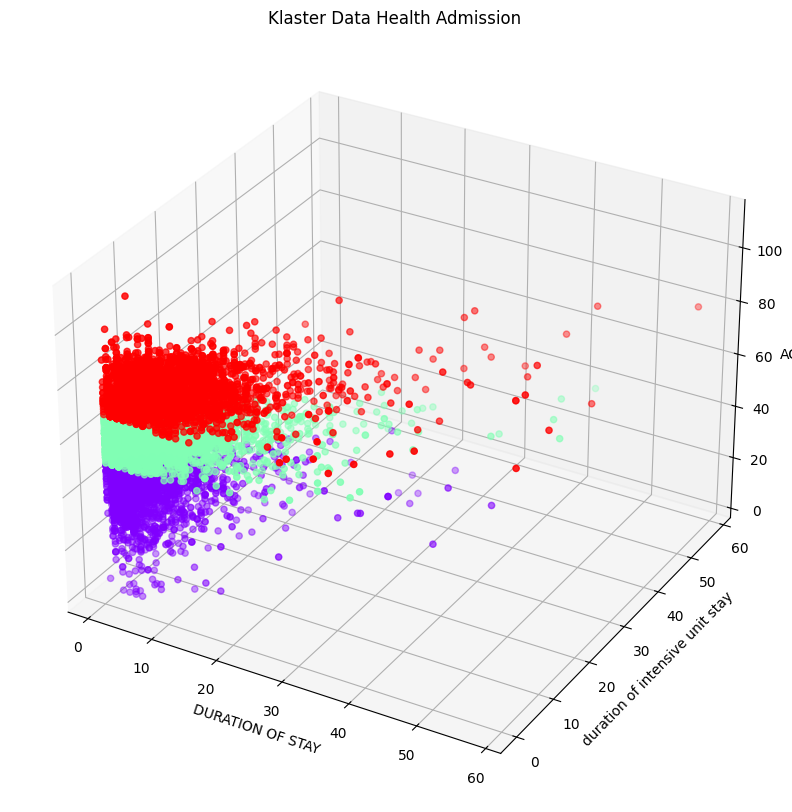

In [51]:
from sklearn.cluster import KMeans

selected = ['DURATION OF STAY', 'duration of intensive unit stay', 'AGE']
feature = df[selected]

# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=3, n_init=10)
assignment = kmeans.fit_predict(feature)
feature.head()
#Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(feature.copy())
df_with_clusters['cluster'] = assignment


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

#Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters[selected[0]]
y = df_with_clusters[selected[1]]
z = df_with_clusters[selected[2]]
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Health Admission")
plt.grid(False)
ax.set_xlabel(selected[0])
ax.set_ylabel(selected[1])
ax.set_zlabel(selected[2])

plt.show()

Hasil clustering tidak terlihat membentuk pola yang baik untuk pendekatan dengan 3 fitur diatas. Sehingga dapat disimpulkan bahwa umur tidak begitu membentuk pola dalam klasifikasi pasien dengan durasi tinggal tertentu.